In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import csv
import seaborn as sns

In [2]:
BIGDAT = np.load('BigData.npy')

In [3]:
DF = pd.DataFrame(BIGDAT, columns=['TrainSteps', 'Error (Deg)', 'Seed', 'Geometry', 'Filter Length'])
DF.loc[DF['Geometry']==3 ,'Geometry']='Triangle'
DF.loc[DF['Geometry']==4 ,'Geometry']='Square'
DF.loc[DF['Geometry']==5 ,'Geometry']='Pentagon'
DF.loc[DF['Geometry']==6 ,'Geometry']='Hexagon'

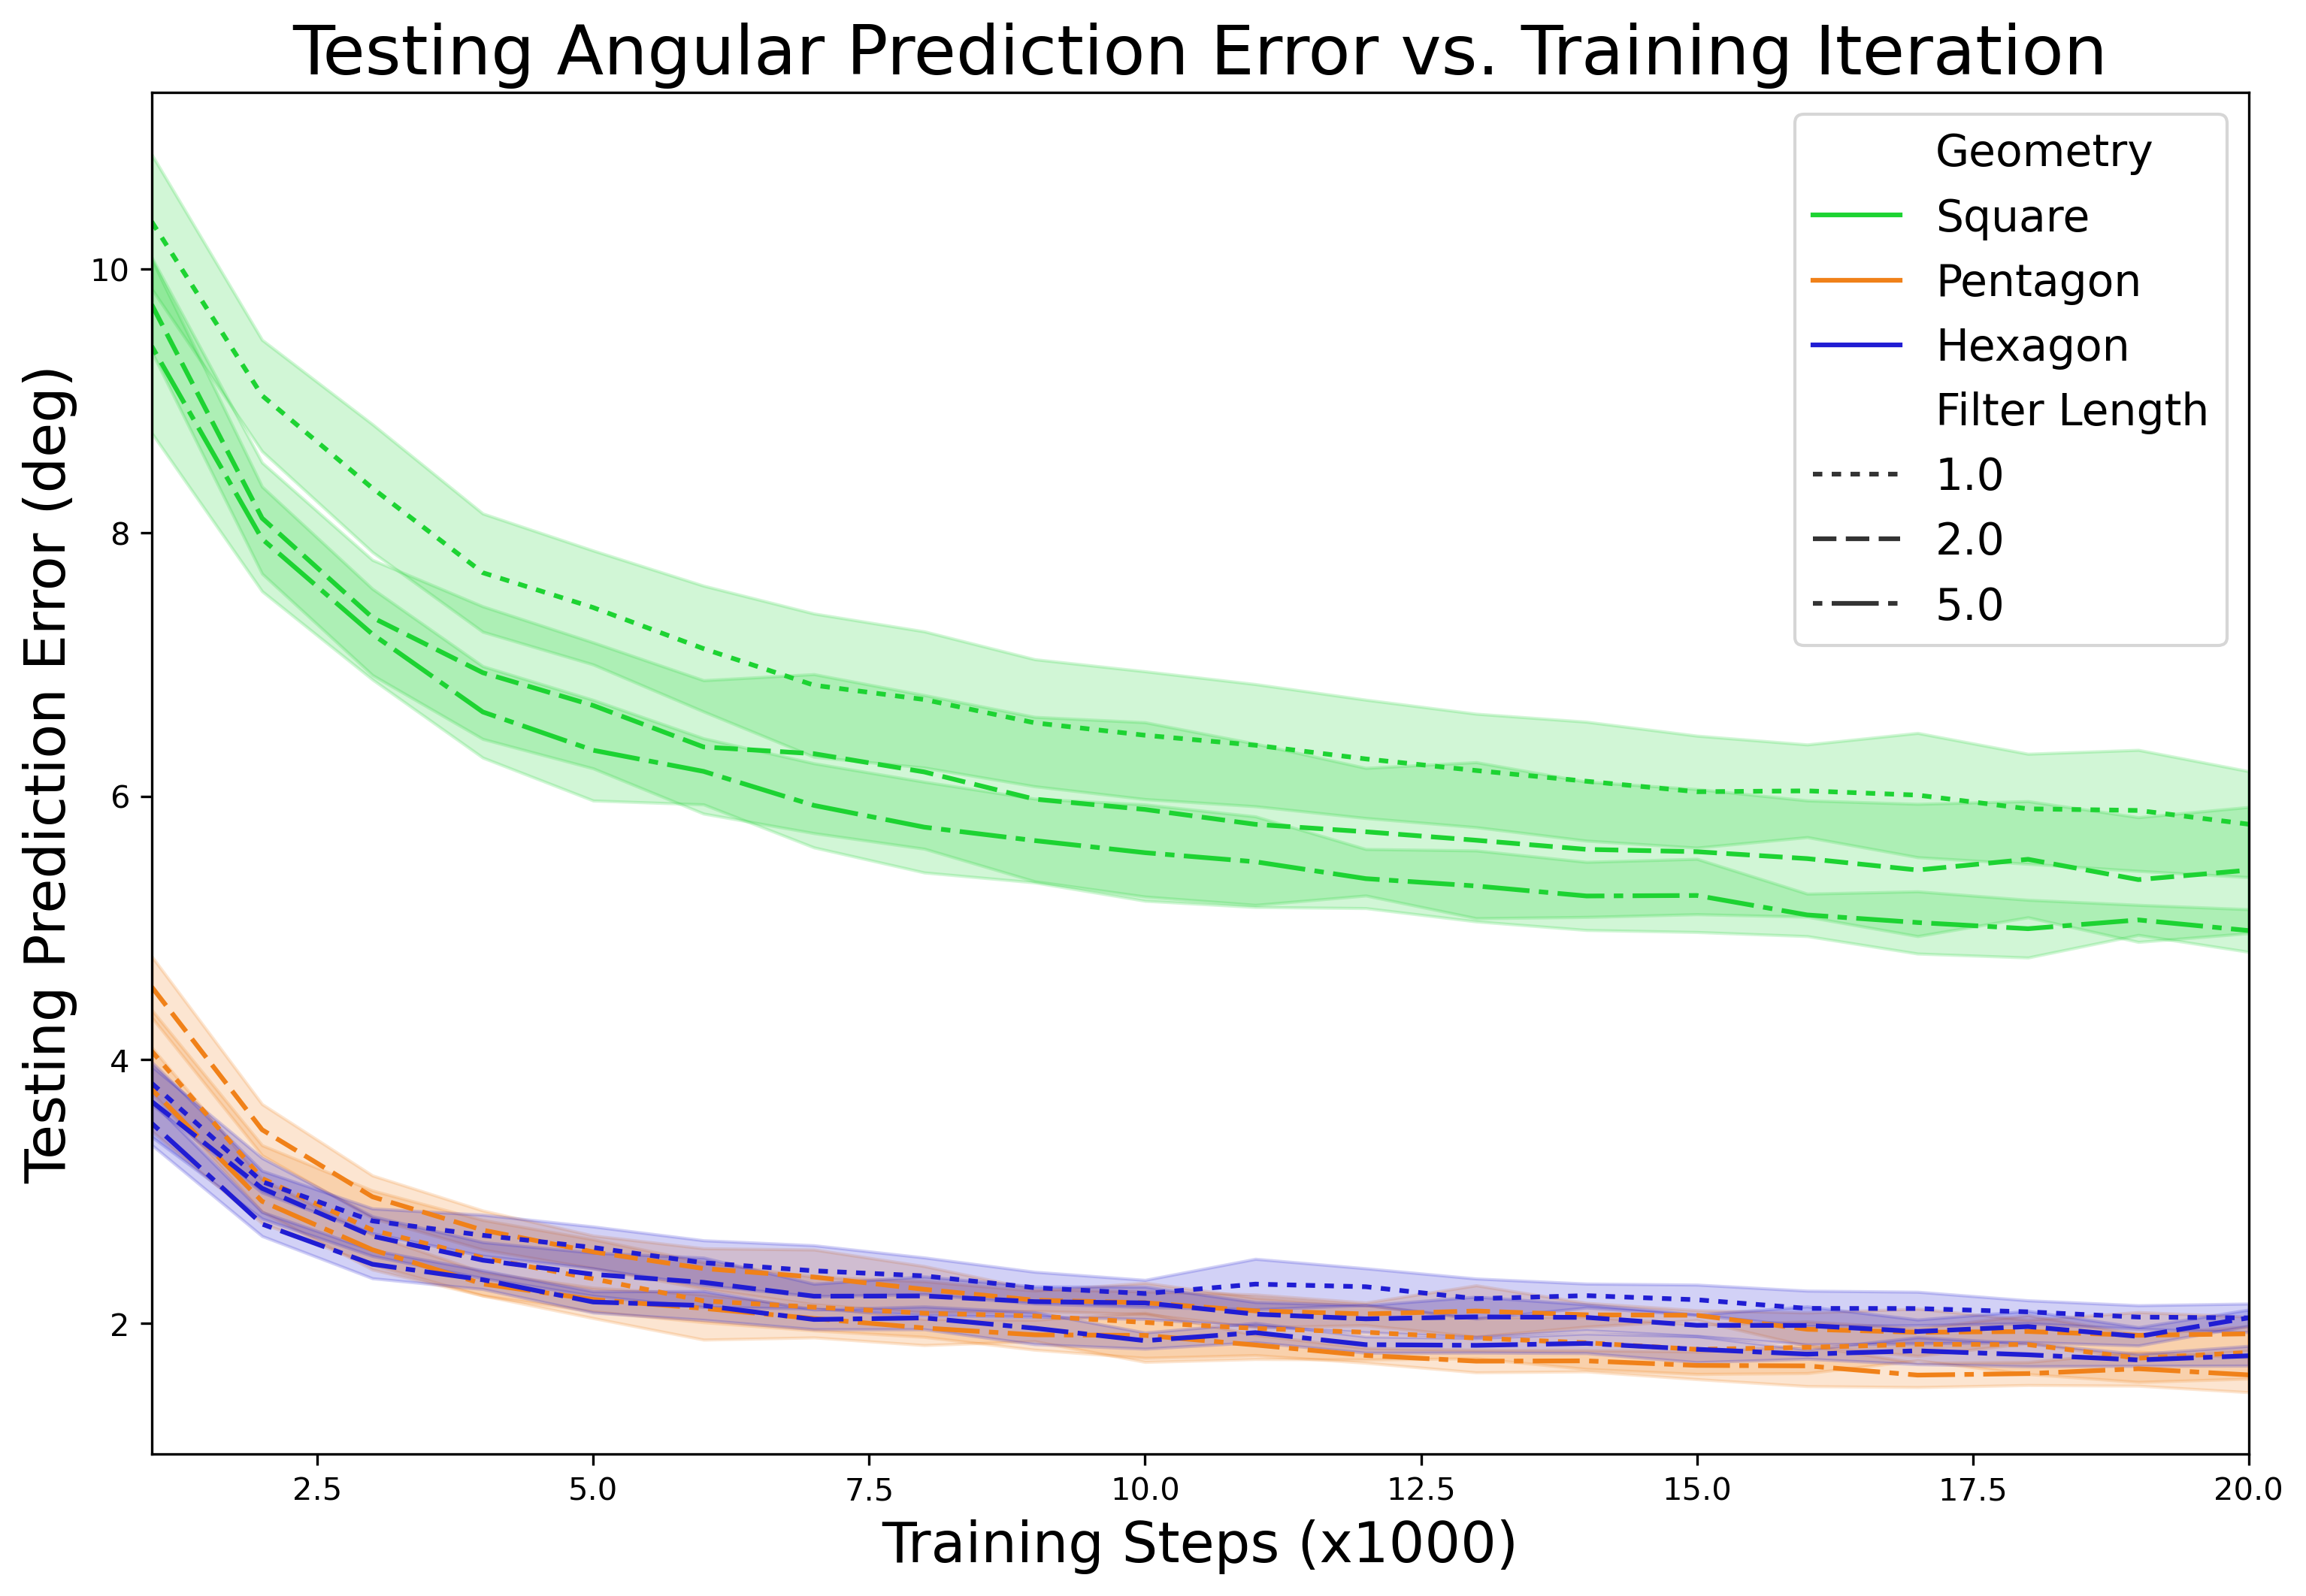

In [5]:

plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14

ax = sns.lineplot(x="TrainSteps", y="Error (Deg)", hue="Geometry", style='Filter Length', palette=['#1dd332', '#f08119', '#201dd3'], dashes=[(2, 2), (5, 2), (2, 2, 10, 2)], data=DF[(DF.Geometry.isin(['Square', 'Pentagon', 'Hexagon'])) & DF.TrainSteps>0], ci='sd')
plt.title('Angular Prediction Error vs. Training Iteration', fontsize=titleFont)
ax.set_xlabel('Training Steps (x1000)', fontsize=axisFont)
plt.xlim([1, 20])
ax.set_ylabel('Testing Prediction Error (deg)', fontsize=axisFont)
ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('TrainingCurve.png')
plt.show()

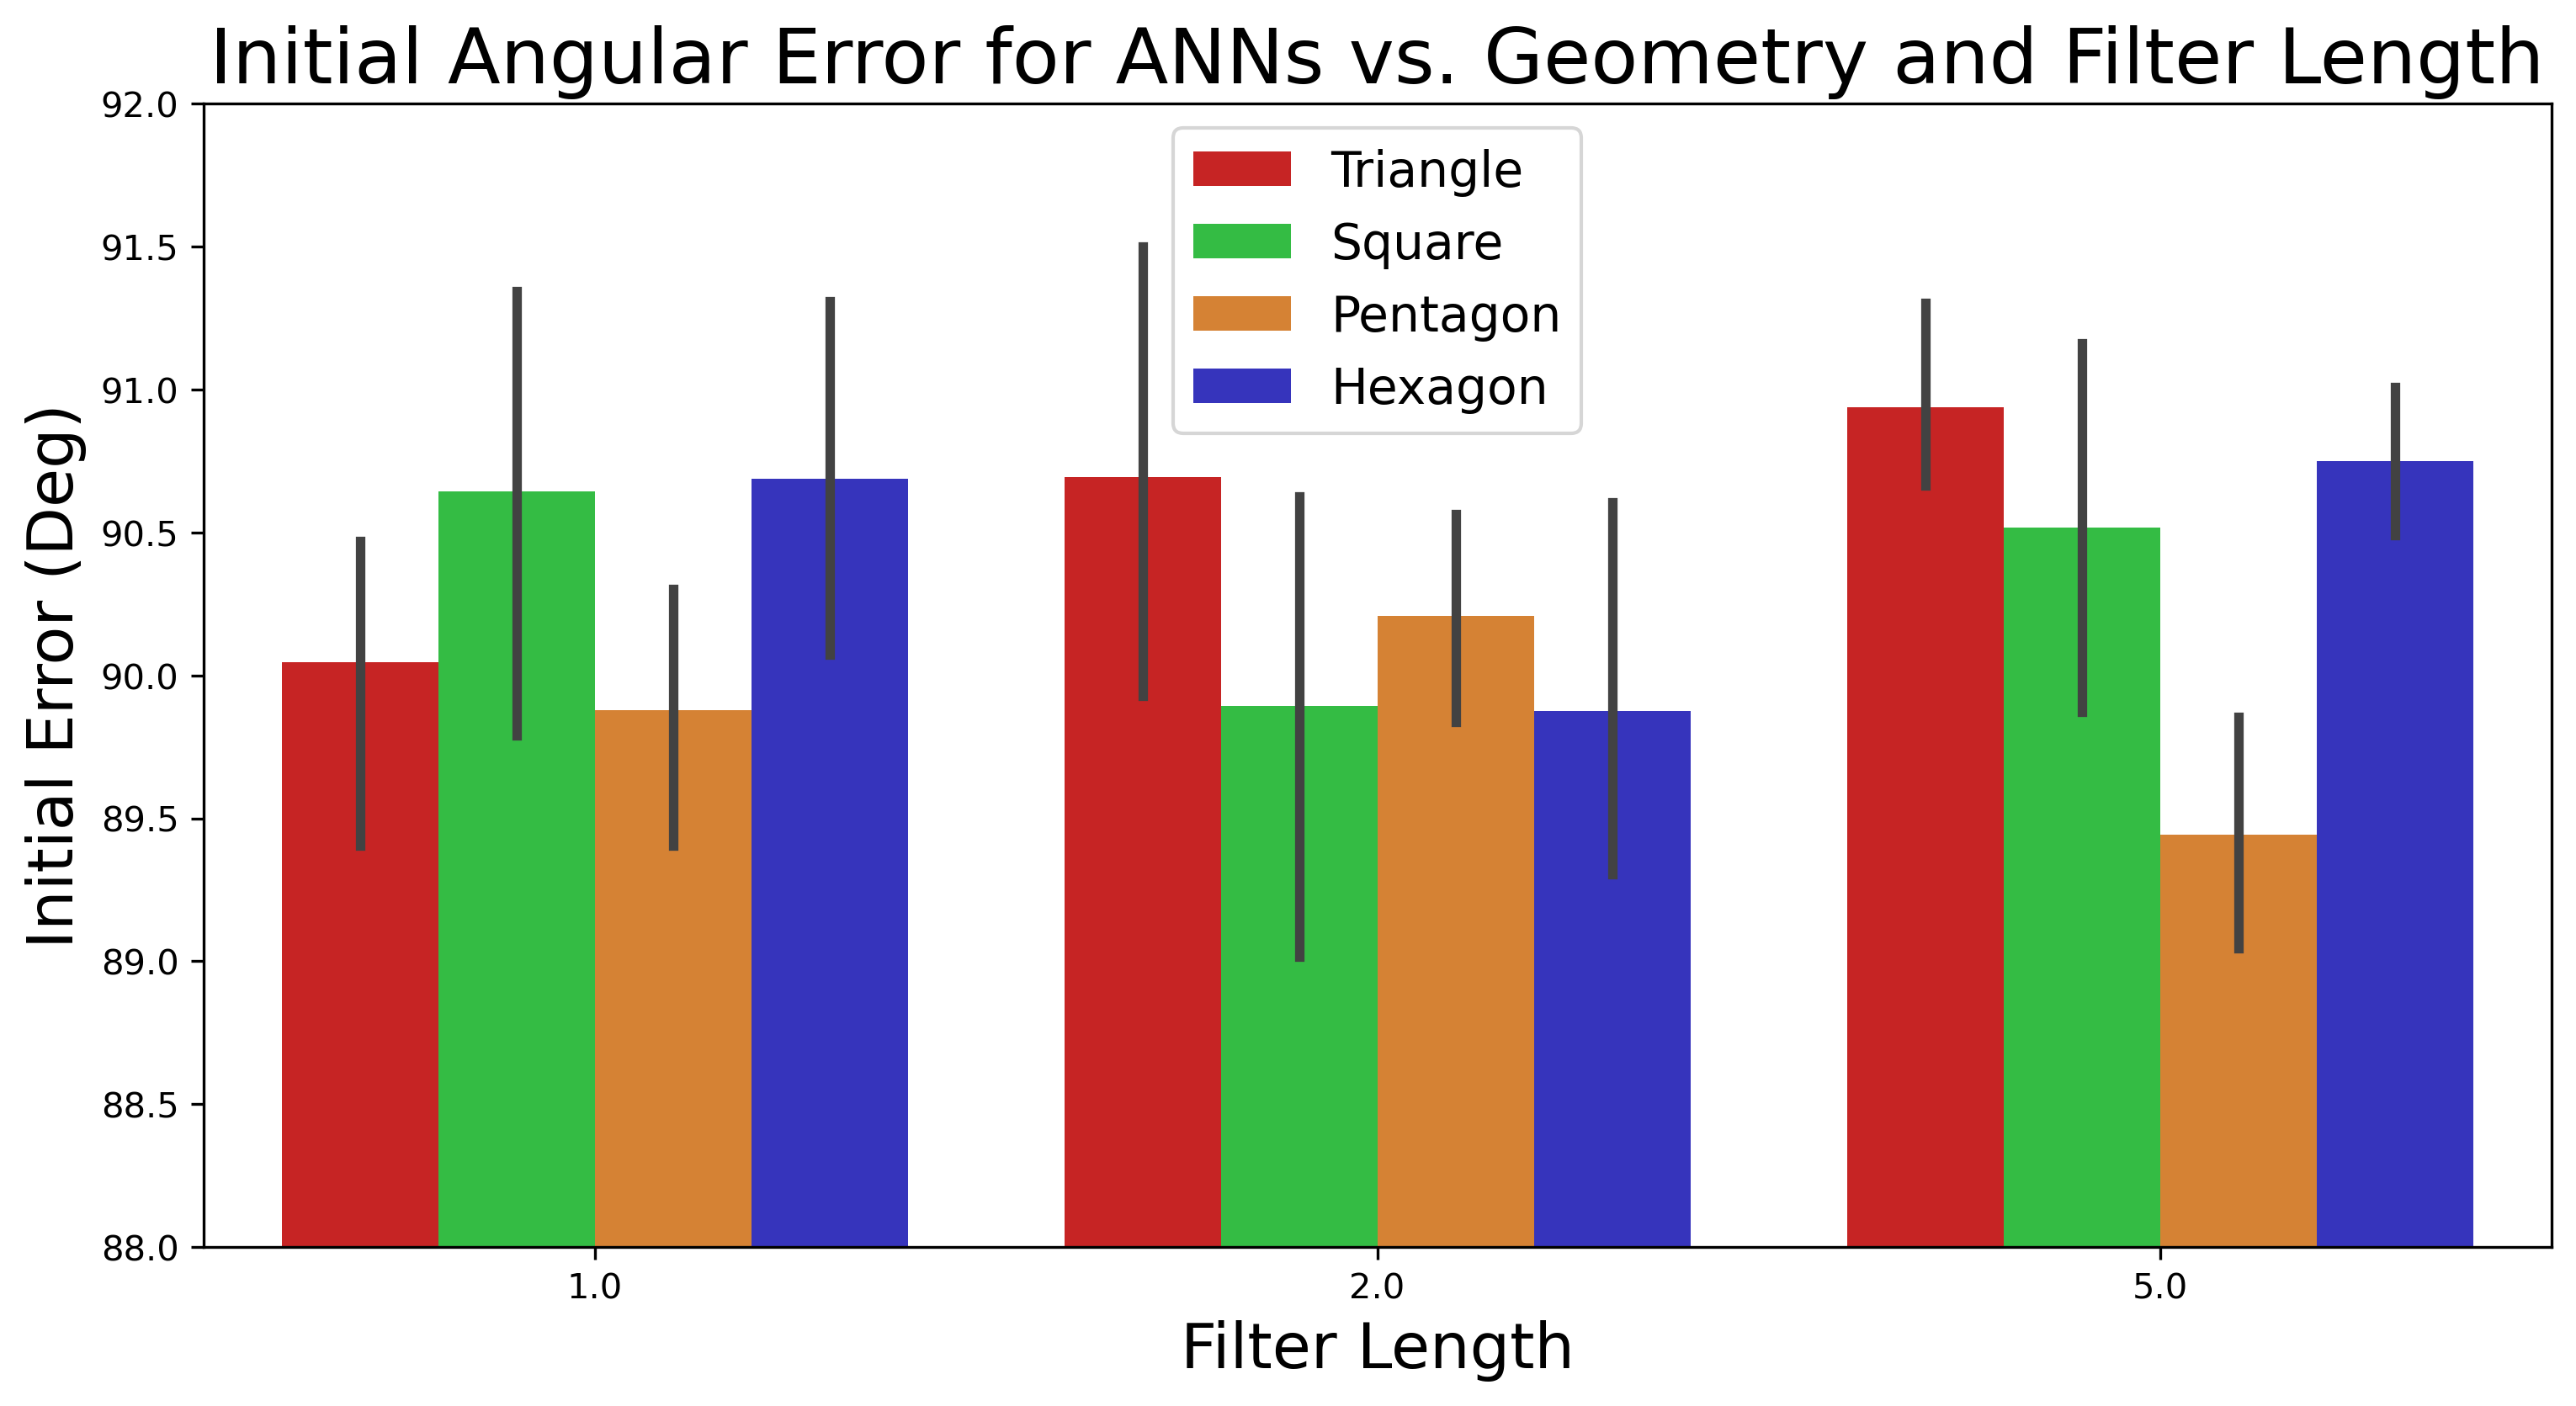

In [10]:
plt.figure(figsize=(12, 6), dpi=300)
ax2 = sns.barplot(x="Filter Length", y="Error (Deg)", hue="Geometry", palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], data=DF[(DF.TrainSteps==0)])
plt.title('Initial Angular Error for ANNs vs. Geometry and Filter Length', fontsize=titleFont)
ax2.set_xlabel("Filter Length", fontsize = axisFont)
ax2.set_ylabel("Initial Error (Deg)", fontsize = axisFont)
plt.ylim([88, 92])
plt.grid(False)
ax2.legend(fontsize=legendFont)
plt.savefig('Initialization.png')
plt.show()



In [ ]:
'''
# Order in bigData is [tri -- squ -- pent -- hex]
NN = np.array([1, 2, 5])
lenTraj = 31
nFilt = 3
nGeom = 4
nSeed = 5
BIGDAT = np.zeros((nFilt*nGeom*nSeed*lenTraj, 5))
for ii in range(nFilt):
    for jj in np.arange(3, 3+nGeom):
        geometryVal = jj
        for kk in range(nSeed):
            if geometryVal == 3:
                geomPath='tri/'
                geoString = 'TRI'
            elif geometryVal == 4:
                geomPath='squ/'
                geoString = 'SQU'
            elif geometryVal == 5:
                geomPath='pent/'
                geoString = 'PENT'
            elif geometryVal == 6:
                geomPath='hex/'
                geoString = 'HEX'
            else:
                raise ValueError('Geometry must be in {3, 4, 5, 6}')

            testPath='../compVal_N'+str(NN[ii])+'/' + geomPath + 'testCost'+str(kk)+'.csv'
            # testPathInit = 'compVal_N'+str(NN[ii])+'/' + geomPath + 'testCostInit'+str(kk)+'.csv'
            
            tmp = np.zeros((lenTraj, 5))
            # tmp[0,:2] = pd.read_csv(testPathInit, header=None).to_numpy()
            tmp[0:,:2] = pd.read_csv(testPath, header=None).to_numpy()
            # tmp[1:,0] += 1
            tmp[:,2] = np.ones(lenTraj)*(kk+1)
            tmp[:,3] = np.ones(lenTraj)*geometryVal
            tmp[:,4] = np.ones(lenTraj)*NN[ii]
            
            BIGDAT[(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + kk*lenTraj):(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + (kk+1)*lenTraj), :] = tmp

# Save to npy file
np.save('BigData.npy', BIGDAT)
'''
